<a href="https://colab.research.google.com/github/psuarezserrato/tda-examples/blob/main/tda-in-pangenomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://paumayell.github.io/pangenomics/11-tda-in-pangenomes/index.html

In [2]:
import pandas as pd

In [3]:
import matplotlib

In [4]:
from matplotlib import cm

In [7]:
pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.4 MB/s eta 0:00:00


In [8]:
import time
import os

In [9]:
import gudhi

In [10]:
url = "https://raw.githubusercontent.com/paumayell/pangenomics/gh-pages/files/mini-genomes.blast"
blastE = pd.read_csv(url, sep='\t', names=['qseqid', 'sseqid', 'evalue'])

In [12]:
import numpy as np

In [13]:
qseqid_unique=pd.unique(blastE['qseqid'])
sseqid_unique=pd.unique(blastE['sseqid'])
genes = pd.unique(np.append(qseqid_unique, sseqid_unique))

In [14]:
len(genes)

43

In [15]:
blastE

,qseqid,sseqid,evalue
0,2603V|GBPINHCM_01420,NEM316|AOGPFIKH_01528,4.110000e-67
1,2603V|GBPINHCM_01420,A909|MGIDGNCP_01408,4.110000e-67
2,2603V|GBPINHCM_01420,515|LHMFJANI_01310,4.110000e-67
3,2603V|GBPINHCM_01420,2603V|GBPINHCM_01420,4.110000e-67
4,2603V|GBPINHCM_01420,A909|MGIDGNCP_01082,1.600000e+00
...,...,...,...
385,NEM316|AOGPFIKH_00403,515|LHMFJANI_00394,2.200000e-134
386,NEM316|AOGPFIKH_00403,NEM316|AOGPFIKH_01842,3.200000e-01
387,NEM316|AOGPFIKH_00403,515|LHMFJANI_01625,3.200000e-01
388,NEM316|AOGPFIKH_00403,NEM316|AOGPFIKH_01415,6.300000e+00


In [16]:
df_genes=pd.DataFrame(genes, columns=['Genes'])
df_genome_genes=df_genes["Genes"].str.split("|", n = 1, expand = True)
df_genome_genes.columns= ["Genome", "Gen"]
genomes=pd.unique(df_genome_genes['Genome'])
genomes=list(genomes)
genomes

['2603V', '515', 'A909', 'NEM316']

In [17]:
distance_list = blastE[ blastE['qseqid'].isin(genes) & blastE['sseqid'].isin(genes)]
distance_list.head()

,qseqid,sseqid,evalue
0,2603V|GBPINHCM_01420,NEM316|AOGPFIKH_01528,4.110000e-67
1,2603V|GBPINHCM_01420,A909|MGIDGNCP_01408,4.110000e-67
2,2603V|GBPINHCM_01420,515|LHMFJANI_01310,4.110000e-67
3,2603V|GBPINHCM_01420,2603V|GBPINHCM_01420,4.110000e-67
4,2603V|GBPINHCM_01420,A909|MGIDGNCP_01082,1.600000e+00


In [18]:
MaxDistance = 5.0000000

# reshape long to wide
matrixE = pd.pivot_table(distance_list,index = "qseqid",values = "evalue",columns = 'sseqid')
matrixE.iloc[1:5,1:5]

sseqid,2603V|GBPINHCM_00097,2603V|GBPINHCM_00348,2603V|GBPINHCM_00401,2603V|GBPINHCM_00554
qseqid,,,,
2603V|GBPINHCM_00097,9.580000e-100,NaN,NaN,NaN
2603V|GBPINHCM_00348,NaN,0.0,NaN,4.4
2603V|GBPINHCM_00401,NaN,NaN,2.560000e-135,NaN
2603V|GBPINHCM_00554,NaN,5.9,NaN,0.0


In [19]:
matrixE2=matrixE.fillna(MaxDistance)
matrixE2.iloc[0:4,0:4]

sseqid,2603V|GBPINHCM_00065,2603V|GBPINHCM_00097,2603V|GBPINHCM_00348,2603V|GBPINHCM_00401
qseqid,,,,
2603V|GBPINHCM_00065,1.240000e-174,5.000000e+00,5.0,5.000000e+00
2603V|GBPINHCM_00097,5.000000e+00,9.580000e-100,5.0,5.000000e+00
2603V|GBPINHCM_00348,5.000000e+00,5.000000e+00,0.0,5.000000e+00
2603V|GBPINHCM_00401,5.000000e+00,5.000000e+00,5.0,2.560000e-135


In [20]:
name_columns = matrixE2.columns
name_columns

Index(['2603V|GBPINHCM_00065', '2603V|GBPINHCM_00097', '2603V|GBPINHCM_00348',
       '2603V|GBPINHCM_00401', '2603V|GBPINHCM_00554', '2603V|GBPINHCM_00748',
       '2603V|GBPINHCM_00815', '2603V|GBPINHCM_01042', '2603V|GBPINHCM_01226',
       '2603V|GBPINHCM_01231', '2603V|GBPINHCM_01420', '515|LHMFJANI_00064',
       '515|LHMFJANI_00097', '515|LHMFJANI_00342', '515|LHMFJANI_00394',
       '515|LHMFJANI_00548', '515|LHMFJANI_00781', '515|LHMFJANI_01130',
       '515|LHMFJANI_01178', '515|LHMFJANI_01310', '515|LHMFJANI_01625',
       'A909|MGIDGNCP_00064', 'A909|MGIDGNCP_00096', 'A909|MGIDGNCP_00352',
       'A909|MGIDGNCP_00405', 'A909|MGIDGNCP_00580', 'A909|MGIDGNCP_00627',
       'A909|MGIDGNCP_00877', 'A909|MGIDGNCP_01082', 'A909|MGIDGNCP_01221',
       'A909|MGIDGNCP_01268', 'A909|MGIDGNCP_01343', 'A909|MGIDGNCP_01408',
       'NEM316|AOGPFIKH_00065', 'NEM316|AOGPFIKH_00098',
       'NEM316|AOGPFIKH_00350', 'NEM316|AOGPFIKH_00403',
       'NEM316|AOGPFIKH_00621', 'NEM316|AOGPFIKH_

In [21]:
DistanceMatrix = matrixE2.to_numpy()
DistanceMatrix

array([[1.24e-174, 5.00e+000, 5.00e+000, ..., 5.00e+000, 5.00e+000,
        5.00e+000],
       [5.00e+000, 9.58e-100, 5.00e+000, ..., 5.00e+000, 5.00e+000,
        5.00e+000],
       [5.00e+000, 5.00e+000, 0.00e+000, ..., 5.00e+000, 5.00e+000,
        5.00e+000],
       ...,
       [5.00e+000, 5.00e+000, 5.00e+000, ..., 1.64e-143, 5.00e+000,
        5.00e+000],
       [5.00e+000, 5.00e+000, 5.00e+000, ..., 5.00e+000, 4.11e-067,
        5.00e+000],
       [5.00e+000, 5.00e+000, 5.00e+000, ..., 5.00e+000, 5.00e+000,
        0.00e+000]])

In [22]:
max_edge_length = 2
# Rips complex with the distance matrix
start_time = time.time()
ripsComplex = gudhi.RipsComplex(
    distance_matrix = DistanceMatrix,
    max_edge_length = max_edge_length
)
print("The Rips complex was created in %s" % (time.time() - start_time) )

The Rips complex was created in 0.000675201416015625


In [23]:
start_time = time.time()
simplexTree = ripsComplex.create_simplex_tree(
    max_dimension = 8)
print("The filtration of the Rips complex was created in %s" % (time.time() - start_time))

The filtration of the Rips complex was created in 0.0013723373413085938


In [24]:
start_time = time.time()
persistence = simplexTree.persistence()
print("The persistente diagram of the Rips complex was created in %s" % (time.time() - start_time))


The persistente diagram of the Rips complex was created in 0.001680612564086914


In [25]:
result_str = 'Rips complex of dimension ' + repr(simplexTree.dimension())
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplexTree.get_filtration():
    print(tuple(filtered_value))

Rips complex of dimension 7
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([2, 13], 0.0)
([14], 0.0)
([15], 0.0)
([4, 15], 0.0)
([16], 0.0)
([6, 16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([2, 23], 0.0)
([13, 23], 0.0)
([2, 13, 23], 0.0)
([24], 0.0)
([25], 0.0)
([4, 25], 0.0)
([15, 25], 0.0)
([4, 15, 25], 0.0)
([26], 0.0)
([27], 0.0)
([6, 27], 0.0)
([16, 27], 0.0)
([6, 16, 27], 0.0)
([28], 0.0)
([7, 28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([2, 35], 0.0)
([13, 35], 0.0)
([2, 13, 35], 0.0)
([23, 35], 0.0)
([2, 23, 35], 0.0)
([13, 23, 35], 0.0)
([2, 13, 23, 35], 0.0)
([36], 0.0)
([37], 0.0)
([4, 37], 0.0)
([15, 37], 0.0)
([4, 15, 37], 0.0)
([25, 37], 0.0)
([4, 25, 37], 0.0)
([15, 25, 37], 0.0)
([4, 15, 25, 37], 0.0)
([38], 0.0)
([6, 38], 0.0)
([16, 38], 0.0)
([6, 16, 38], 0.0

In [26]:
simplexTree.dimension(), simplexTree.num_vertices(), simplexTree.num_simplices()

(7, 43, 467)

Bar code diagram was created in 0.06952357292175293


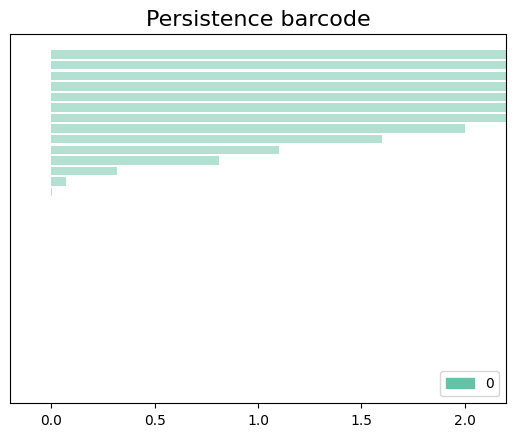

In [27]:
start_time = time.time()
gudhi.plot_persistence_barcode(
    persistence = persistence,
    alpha = 0.5,
    colormap = cm.Set2.colors
)
print("Bar code diagram was created in %s" % (time.time() - start_time))

In [29]:
def dimension(list):
    return (len(list[0])-1, list[1])

In [30]:
all_simplex_sorted_dim_1 = sorted(simplexTree.get_filtration(), key = dimension, reverse = True)
all_simplex_sorted_dim_1

[([4, 9, 15, 18, 25, 30, 37, 39], 0.014),
 ([4, 9, 15, 18, 25, 30, 37], 0.014),
 ([4, 9, 15, 18, 25, 30, 39], 0.014),
 ([4, 9, 15, 18, 25, 37, 39], 0.014),
 ([4, 9, 15, 18, 30, 37, 39], 0.014),
 ([4, 9, 15, 25, 30, 37, 39], 0.014),
 ([4, 9, 18, 25, 30, 37, 39], 0.014),
 ([9, 15, 18, 25, 30, 37, 39], 0.014),
 ([4, 15, 18, 25, 30, 37, 39], 0.001),
 ([3, 14, 20, 24, 36, 42], 1.3),
 ([4, 9, 15, 18, 25, 30], 0.014),
 ([4, 9, 15, 18, 25, 37], 0.014),
 ([4, 9, 15, 18, 30, 37], 0.014),
 ([4, 9, 15, 25, 30, 37], 0.014),
 ([4, 9, 18, 25, 30, 37], 0.014),
 ([9, 15, 18, 25, 30, 37], 0.014),
 ([4, 9, 15, 18, 25, 39], 0.014),
 ([4, 9, 15, 18, 30, 39], 0.014),
 ([4, 9, 15, 25, 30, 39], 0.014),
 ([4, 9, 18, 25, 30, 39], 0.014),
 ([9, 15, 18, 25, 30, 39], 0.014),
 ([4, 9, 15, 18, 37, 39], 0.014),
 ([4, 9, 15, 25, 37, 39], 0.014),
 ([4, 9, 18, 25, 37, 39], 0.014),
 ([9, 15, 18, 25, 37, 39], 0.014),
 ([4, 9, 15, 30, 37, 39], 0.014),
 ([4, 9, 18, 30, 37, 39], 0.014),
 ([9, 15, 18, 30, 37, 39], 0.014),
 ([

In [31]:
d_simplex_time = dict()
d_simplex_const = dict()
names = []
for tuple_simple in all_simplex_sorted_dim_1:
    list_aux = []
    if len(tuple_simple[0])-1 == simplexTree.dimension():
        t_birth = tuple_simple[1]
        t_death = max_edge_length
        d_simplex_time[tuple(tuple_simple[0])] = (t_birth,t_death)
        list_aux = tuple([name_columns[tuple_simple[0][i]] for i in range(len(tuple_simple[0]))])
        d_simplex_const[list_aux] = (t_birth,t_death)
    else:
        t_birth = tuple_simple[1]
        t_death = max_edge_length
        for simplex in d_simplex_time.keys():
            if set(tuple_simple[0]).issubset(set(simplex)):
                t_death = d_simplex_time[simplex][0]
        d_simplex_time[tuple(tuple_simple[0])] = (t_birth,t_death)
        list_aux = tuple([name_columns[tuple_simple[0][i]] for i in range(len(tuple_simple[0]))])
        d_simplex_const[list_aux] = (t_birth,t_death)


In [32]:
simplices = list()
simplices = list(d_simplex_const.keys())

In [33]:
bool_gen = dict()
genes_contains = dict()
num_new_columns = len(genomes)
for simplex in simplices:
    genes_contains = dict()
    genes_contains = {'2603V': 0, '515': 0, 'A909': 0, 'NEM316': 0}
    for i in range(len(simplex)):
        for genoma in genomes:
            if genoma in simplex[i]:
                genes_contains[genoma] = genes_contains[genoma] +1
    for gen in genomes:
        if gen not in genes_contains.keys():
            genes_contains[gen] = 0
    bool_gen[simplex] = genes_contains
bool_gen

{('2603V|GBPINHCM_00554',
  '2603V|GBPINHCM_01231',
  '515|LHMFJANI_00548',
  '515|LHMFJANI_01178',
  'A909|MGIDGNCP_00580',
  'A909|MGIDGNCP_01268',
  'NEM316|AOGPFIKH_00621',
  'NEM316|AOGPFIKH_01341'): {'2603V': 2, '515': 2, 'A909': 2, 'NEM316': 2},
 ('2603V|GBPINHCM_00554',
  '2603V|GBPINHCM_01231',
  '515|LHMFJANI_00548',
  '515|LHMFJANI_01178',
  'A909|MGIDGNCP_00580',
  'A909|MGIDGNCP_01268',
  'NEM316|AOGPFIKH_00621'): {'2603V': 2, '515': 2, 'A909': 2, 'NEM316': 1},
 ('2603V|GBPINHCM_00554',
  '2603V|GBPINHCM_01231',
  '515|LHMFJANI_00548',
  '515|LHMFJANI_01178',
  'A909|MGIDGNCP_00580',
  'A909|MGIDGNCP_01268',
  'NEM316|AOGPFIKH_01341'): {'2603V': 2, '515': 2, 'A909': 2, 'NEM316': 1},
 ('2603V|GBPINHCM_00554',
  '2603V|GBPINHCM_01231',
  '515|LHMFJANI_00548',
  '515|LHMFJANI_01178',
  'A909|MGIDGNCP_00580',
  'NEM316|AOGPFIKH_00621',
  'NEM316|AOGPFIKH_01341'): {'2603V': 2, '515': 2, 'A909': 1, 'NEM316': 2},
 ('2603V|GBPINHCM_00554',
  '2603V|GBPINHCM_01231',
  '515|LHMFJANI

In [34]:
births = []
deaths = []
persistent_times = []
for values in d_simplex_time.values():
    births.append(values[0])
    deaths.append(values[1])
    persistent_times.append(values[1]-values[0])

In [35]:
data = {
    't_birth': births,
    't_death': deaths,
    'persistence': persistent_times
}
simplex_list = pd.DataFrame(index = simplices, data = data)
simplex_list.head(4)

,t_birth,t_death,persistence
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_00621, NEM316|AOGPFIKH_01341)",0.014,2.000,1.986
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_00621)",0.014,0.014,0.000
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_01341)",0.014,0.014,0.000
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, NEM316|AOGPFIKH_00621, NEM316|AOGPFIKH_01341)",0.014,0.014,0.000


In [36]:
aux_simplex_list = simplex_list
for gen in genomes:
    data = dict()
    dataFrame_aux = []
    for simplex in simplices:
        data[simplex] = bool_gen[simplex][gen]
    dataFrame_aux = pd.DataFrame.from_dict(data, orient='index', columns = [str(gen)])
    aux_simplex_list=pd.concat([aux_simplex_list, dataFrame_aux], axis = 1)
aux_simplex_list.head(4)

,t_birth,t_death,persistence,2603V,515,A909,NEM316
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_00621, NEM316|AOGPFIKH_01341)",0.014,2.000,1.986,2,2,2,2
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_00621)",0.014,0.014,0.000,2,2,2,1
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_01341)",0.014,0.014,0.000,2,2,2,1
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, NEM316|AOGPFIKH_00621, NEM316|AOGPFIKH_01341)",0.014,0.014,0.000,2,2,1,2


In [37]:
aux_simplex_list[aux_simplex_list['t_death']==2]

,t_birth,t_death,persistence,2603V,515,A909,NEM316
"(2603V|GBPINHCM_00554, 2603V|GBPINHCM_01231, 515|LHMFJANI_00548, 515|LHMFJANI_01178, A909|MGIDGNCP_00580, A909|MGIDGNCP_01268, NEM316|AOGPFIKH_00621, NEM316|AOGPFIKH_01341)",1.400000e-02,2.0,1.986,2,2,2,2
"(2603V|GBPINHCM_00401, 515|LHMFJANI_00394, 515|LHMFJANI_01625, A909|MGIDGNCP_00405, NEM316|AOGPFIKH_00403, NEM316|AOGPFIKH_01842)",1.300000e+00,2.0,0.700,1,2,1,2
"(2603V|GBPINHCM_01042, 2603V|GBPINHCM_01420, 515|LHMFJANI_01310, A909|MGIDGNCP_01408, NEM316|AOGPFIKH_01528)",1.600000e+00,2.0,0.400,2,1,1,1
"(2603V|GBPINHCM_00065, 515|LHMFJANI_00064, A909|MGIDGNCP_00064, A909|MGIDGNCP_00627, NEM316|AOGPFIKH_00065)",8.600000e-02,2.0,1.914,1,1,2,1
"(2603V|GBPINHCM_00348, 515|LHMFJANI_00342, A909|MGIDGNCP_00352, NEM316|AOGPFIKH_00350, NEM316|AOGPFIKH_01341)",3.000000e-03,2.0,1.997,1,1,1,2
"(2603V|GBPINHCM_01042, A909|MGIDGNCP_01082, A909|MGIDGNCP_01408, NEM316|AOGPFIKH_01528)",1.600000e+00,2.0,0.400,1,0,2,1
"(2603V|GBPINHCM_00748, 515|LHMFJANI_00064, A909|MGIDGNCP_00064, NEM316|AOGPFIKH_00065)",8.300000e-01,2.0,1.170,1,1,1,1
"(2603V|GBPINHCM_00097, 515|LHMFJANI_00097, A909|MGIDGNCP_00096, NEM316|AOGPFIKH_00098)",9.580000e-100,2.0,2.000,1,1,1,1
"(2603V|GBPINHCM_00815, 515|LHMFJANI_00781, A909|MGIDGNCP_00877, NEM316|AOGPFIKH_00855)",0.000000e+00,2.0,2.000,1,1,1,1
"(2603V|GBPINHCM_00748, 2603V|GBPINHCM_01042, A909|MGIDGNCP_01082)",2.000000e+00,2.0,0.000,2,0,1,0


In [38]:
start_time = time.time()
simplexTree = ripsComplex.create_simplex_tree(
   max_dimension = 3)
persistence = simplexTree.persistence()
simplexTree.dimension(), simplexTree.num_vertices(), simplexTree.num_simplices()


(3, 43, 364)